<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/01_02_project_ulleung_hist_boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 처리

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1. 히스토그램을 활용한 최고 기온, 최저 기온, 평균 기온 분포 확인하기

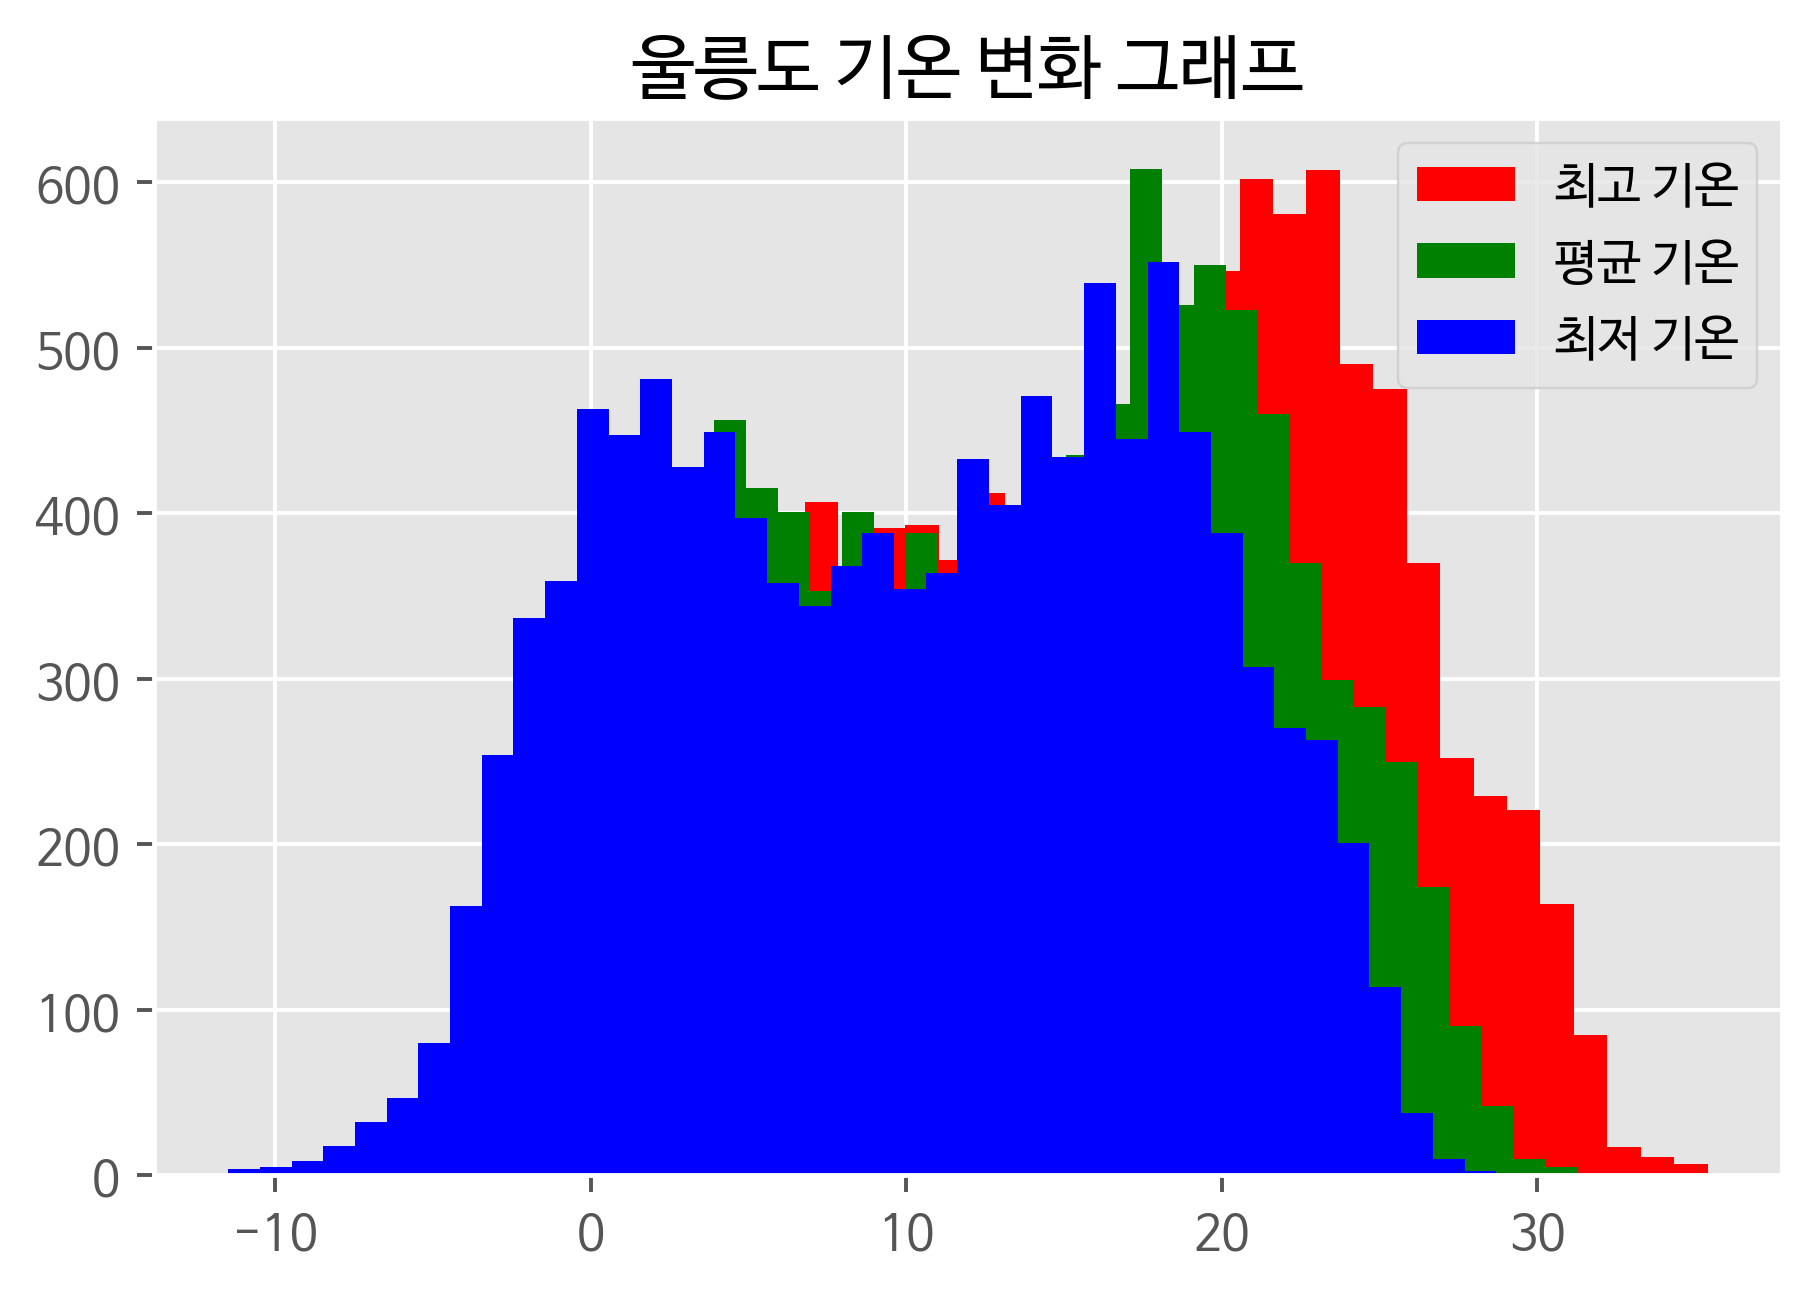

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data) # 헤더 넘기기

# 리스트 생성
maxTempList = [] # 최고 기온 리스트
minTempList = [] # 최저 기온 리스트
meanTempList = [] # 평균 기온 리스트

# 리스트에 기온 담기
for row in data :
  if row[-1] != '' and row[-2] != '' and row[-3] != '' : # 기온 데이터에서 결측치 제외
    maxTempList.append(float(row[-1]))
    minTempList.append(float(row[-2]))
    meanTempList.append(float(row[-3]))

# 데이터 시각화 히스토그램으로 그리기
# 차트 설정
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(dpi=175) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# 차트 그리기
plt.hist(maxTempList, bins=40, color='r', label='최고 기온')
plt.hist(meanTempList, bins=40, color='g', label='평균 기온')
plt.hist(minTempList, bins=40, color='b', label='최저 기온')
plt.title('울릉도 기온 변화 그래프')
plt.legend()
plt.show()

2. 상자그림을 활용한 울릉도와 서울의 최고 기온 비교

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


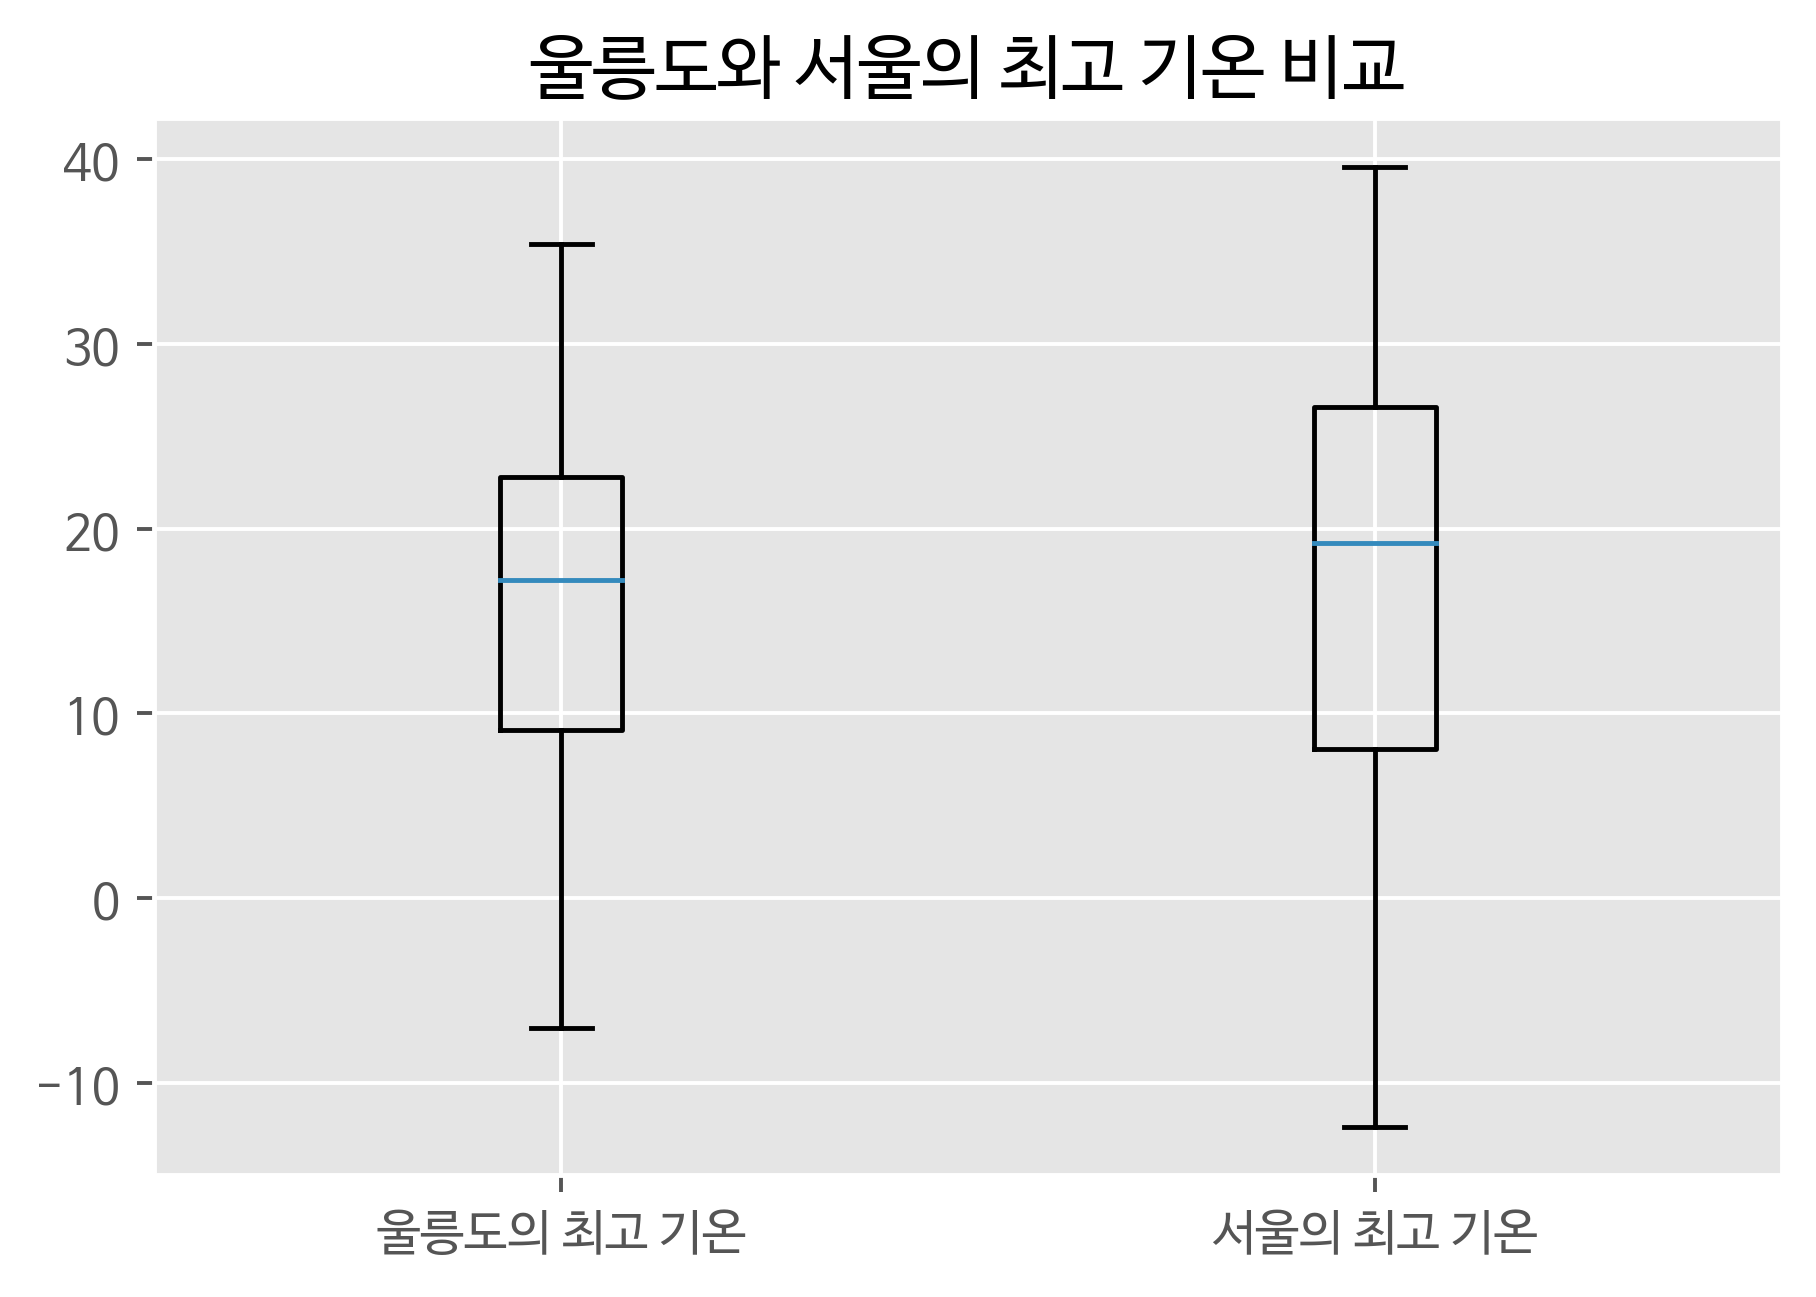

In [ ]:
# 라이브러러 불러오기
import csv
import matplotlib.pyplot as plt

# 울릉도와 서울의 데이터 불러오기
ulleng_f = open('/content/ulleung.csv', encoding='cp949')
seoul_f = open('/content/seoul.csv', encoding='cp949')

ulleng_data = csv.reader(ulleng_f)
seoul_data = csv.reader(seoul_f)

# 헤더 넘기기
next(ulleng_data)
next(seoul_data)

# 울릉도와 서울의 최고 기온 담을 리스트 생성
ulleung_maxTemp = []
seoul_maxTemp = []

# 울릉도의 최고 기온 데이터 리스트에 담기
for row in ulleng_data :
  year = int(row[0].split('-')[0]) # year 변수에 "YYYY-MM-DD"라는 문자열에서 "YYYY"부분만 '-'을 기준으로 나눈 후 저장
  if row[-1] != '' :
    if year <= 2019 : # 서울의 데이터는 2019년까지 밖에 없기 때문에 2020년 부터의 데이터는 가져오지 않는다
      ulleung_maxTemp.append(float(row[-1]))

# 서울의 최고 기온 데이터 리스트에 담기
for row in seoul_data :
  year = int(row[0].split('-')[0]) # year 변수에 "YYYY-MM-DD"라는 문자열에서 "YYYY"부분만 '-'을 기준으로 나눈 후 저장
  if row[-1] != '' :
    if year >= 1990 : # 울릉도의 데이터는 1990년부터 뽑았기 때문에 1990년 이전의 데이터는 가져오지 않는다
      seoul_maxTemp.append(float(row[-1]))

# 상자그림 그리기
# 차트 설정
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(dpi=175) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# 차트 그리기
plt.boxplot([ulleung_maxTemp, seoul_maxTemp], labels=['울릉도의 최고 기온', '서울의 최고 기온'])
plt.title('울릉도와 서울의 최고 기온 비교')
# plt.legend()
plt.show()

3. 월 별 최고 기온 상자 그림 그리기

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


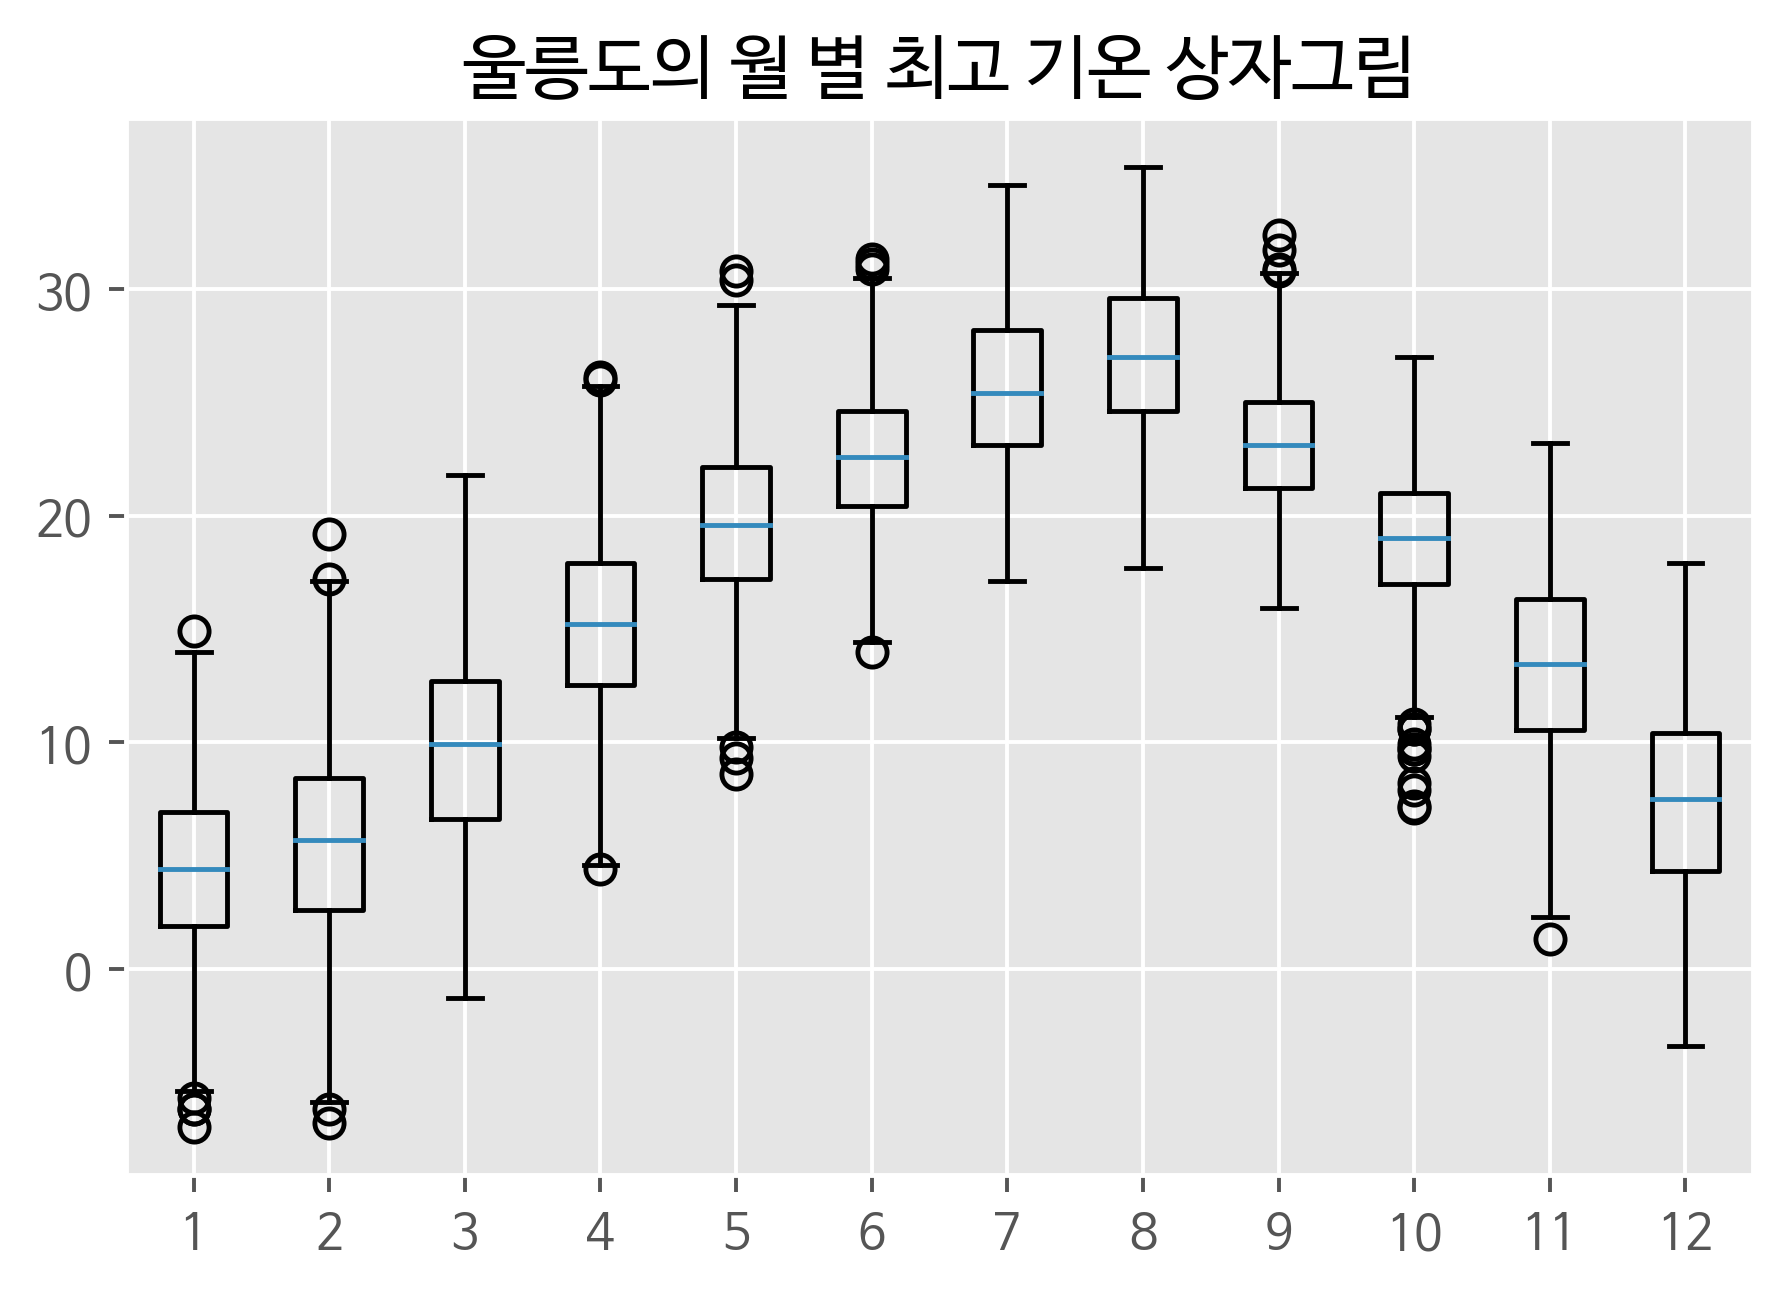

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data) # 헤더 넘기기

# (월별)12개의 리스트 담을 리스트 만들기
month = []
for i in range(12) :
  month.append([])

# 월 별 최고 기온을 해당 월 리스트에 담기
for row in data :
  if row[-1] != '' :
    month[int(row[0].split('-')[1]) - 1].append(float(row[-1]))

# 월 별 최고 기온 상자그림 그리기
# 차트 설정
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(dpi=175) # 해상도 조절
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# 차트 그리기
plt.boxplot(month) # 아웃라이러(이상치) 값 생략하기 위해서 plt.boxplot(month, showfliers=Flase)
plt.title('울릉도의 월 별 최고 기온 상자그림')
plt.show()

4. 특정 달의 일별 최고 기온 상자 그림 그리기

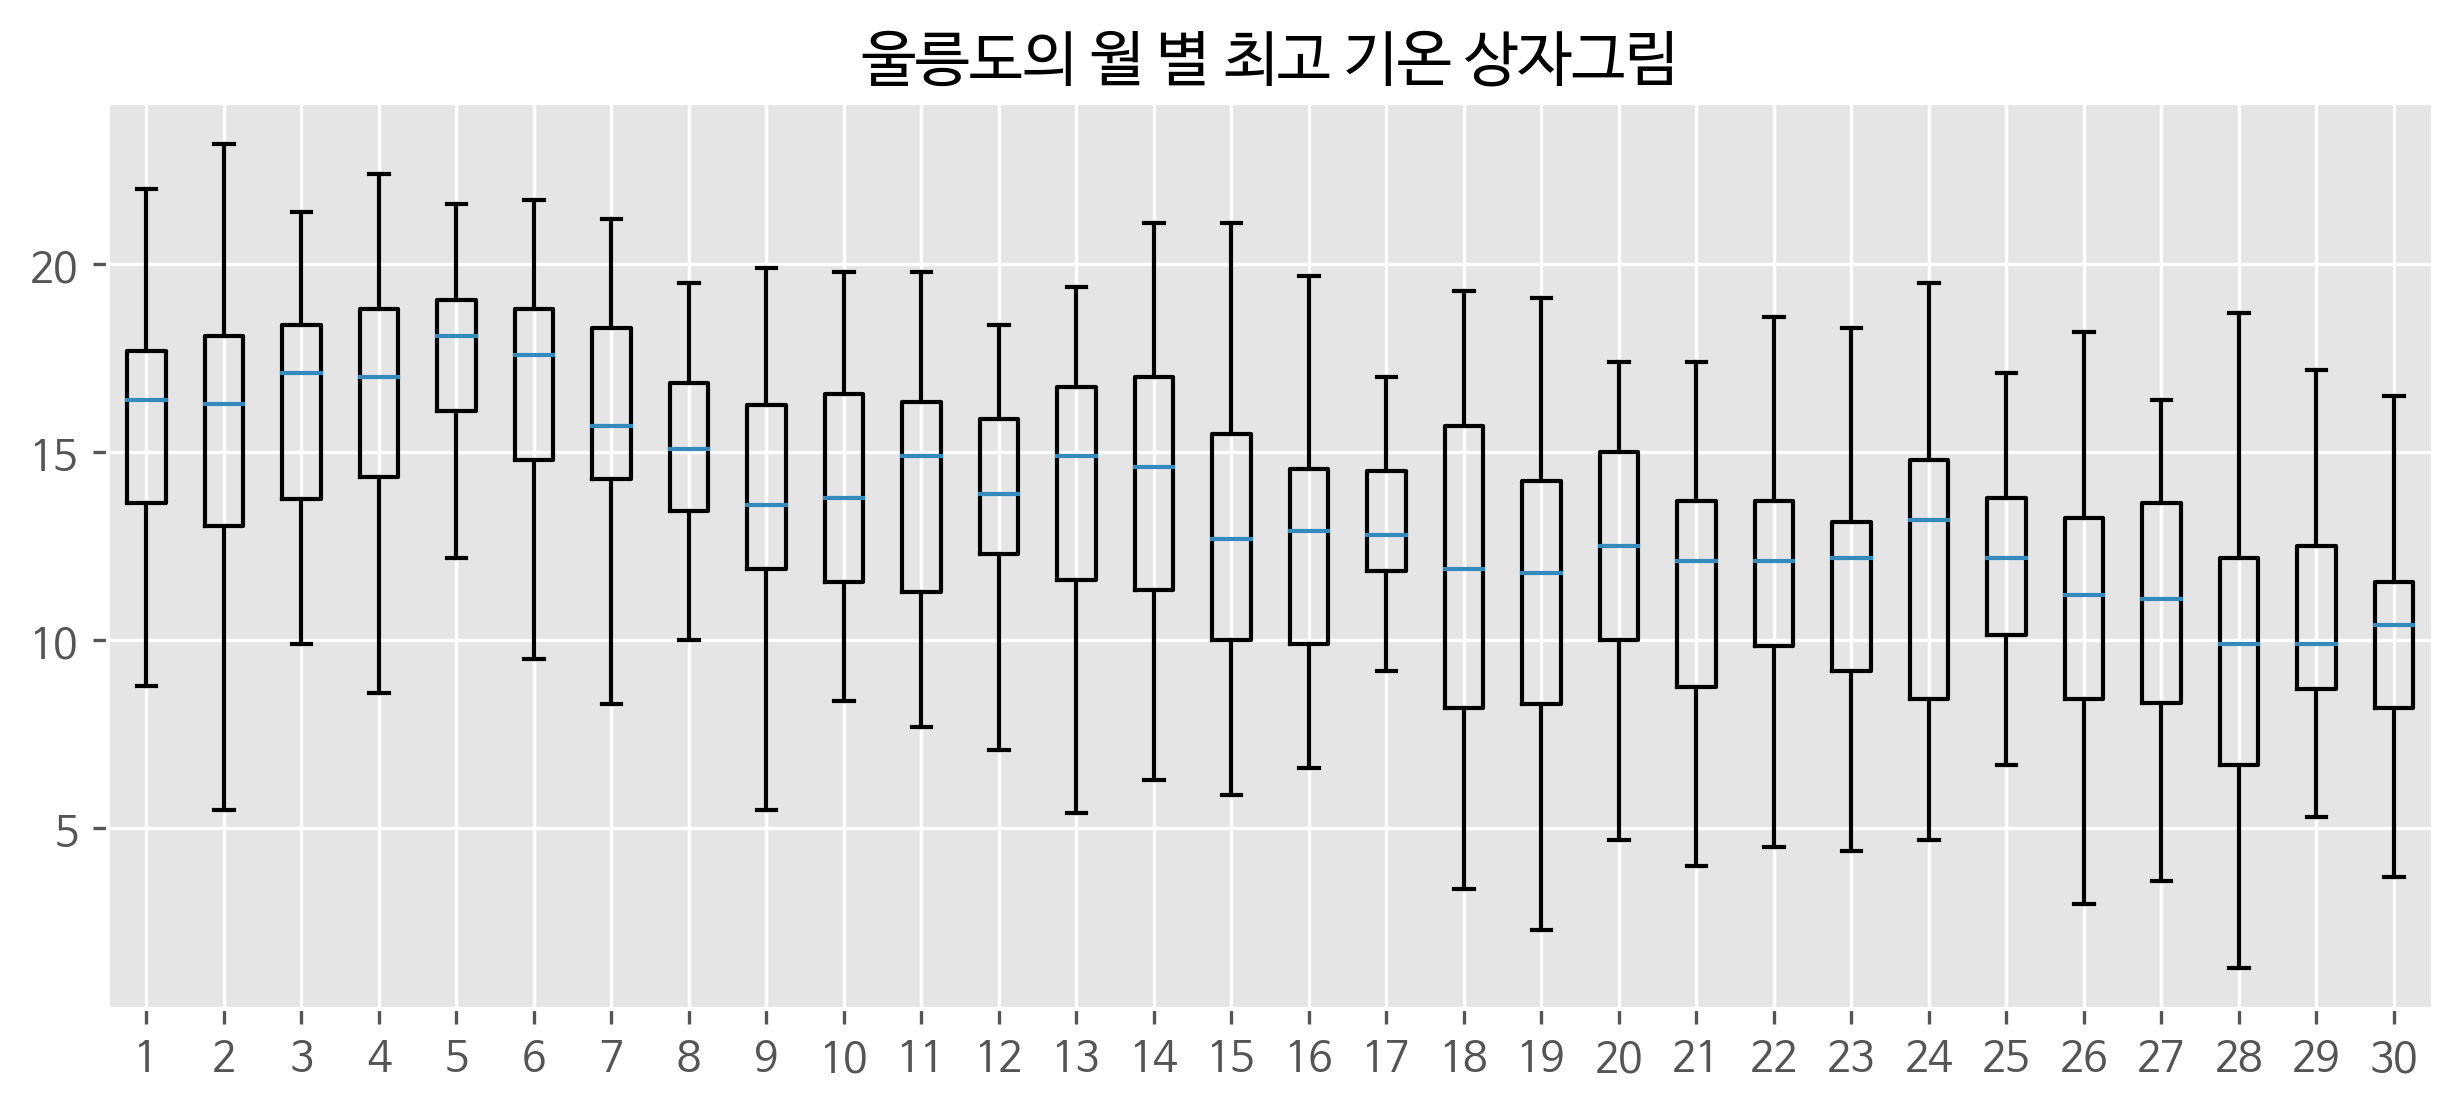

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data) # 헤더 넘기기

# 일 별 데이터를 저장할 리스트 day 변수 선언
day = []
for i in range(30) : # 11월은 30일까지만 있음
  day.append([]) # day 리스트 안에 30개의 리스트 생성[[], [], [], ... 30개]

# 최고 기온을 day 리스트에 담기
for row in data :
  if row[-1] != '' : # 최고 기온 중 결측치 제외
    if row[0].split('-')[1] == '11' : # 11월 최고 기온 값 저장
      day[int(row[0].split('-')[2]) - 1].append(float(row[-1])) # ex) day[0] -> 1일에 저장, day[1] -> 2일에 저장...

# 일 별 최고 기온 상자그림 그리기
# 차트 설정
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize=(10,4), dpi=150)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# 차트 그리기
plt.boxplot(day, showfliers=False) # 아웃라이어(이상치) 값 생략 showfliers
plt.title('울릉도의 월 별 최고 기온 상자그림')
plt.show()